In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import math
import cmath
import scipy
import scipy.interpolate as interpolate
import scipy.integrate as integrate
import scipy.special as special
import numpy.ma as ma
#np.set_printoptions(threshold=sys.maxsize)
pts = 5000 # number of iterator steps where neccessary
H_to_K = 1/0.000003166808534191 # conversion of Henries to Kelvin
tol = 1e-6 # tolerance where neccessary

In [2]:
r4_list = np.arange(200, 600, 100)

r1 = 4.5 # starting posistion r1 in ao
r2 = 100 # ending posistion r2 in ao
dr1 = 0.05 # step spacing in ao
dr2 = 0.02
r3 = 500

dr3 = 0.05
r4 = 700


#N1 = int((r2-r1)/dr1) # Number of grid points
#Np = int((r3-r1)/dr2) # Number of grid points
Npp = int((r4-r1)/dr3)

#ipap = np.arange(1,N1, 1.0) # indexing from the paper, given i = 1,2,...,N-1
#ipap_p = np.arange(1,Np, 1.0) # indexing from the paper, given i = 1,2,...,N-1
ipap_pp = np.arange(1,Npp, 1.0)

#r = r1 + dr1*ipap
#rp = r1 + dr2*ipap_p
rpp = r1 + dr3*ipap_pp
print(len(rpp))


C12 = 3.05e8 # C12 coefficient in Eh*ao
C6 = 4710 # C6 coefficient in Eh*ao
C6p = 4e6 # C6' coefficient in Eh*ao
C3 = 20 # C3 coefficient in Eh*ao

VLJ = (C12/(rpp**12)) - (C6/(rpp**6)) # standard Lennard-Jones interatomic potential
VE = (C6p*(1/(rpp**6))) - (C3*(1/(rpp**3)))

Eo = 3.166808534191e-12 # inital particle energy, 1uK in Hartrees
me = 9.1093837e-28 # electron mass in grams
mrb_g = 1.4192261e-22 # rubidium mass in grams
mrb = mrb_g/me # rubidium mass in au
mu = (mrb**2)/(2*mrb) # reduced mass of rubidium
hbar = 1.0546e-27 # reduced Planck constant in cgs
e = 4.8032e-10 # electron charge in cgs
ao = (hbar**2)/(me*e**2) # Bohr radius in cgs

13909


# Ground State --- Lennard-Jones
## $V(r) = \frac{C_{12}}{r^{12}} - \frac{C_{6}}{r^{6}}$
## $C_{12} = 3.05\times10^{8} E_{h}a_{0}$, $C_{6} = 4710 E_{h}a_{0}$

#  $ 1^{st} $ Excited State --- C3 thing 
## $V_E(r) = \frac{C_{6}'}{r^{6}} - \frac{C_{3}}{r^{3}}$
## $C_{6}' = 4\times10^{6} E_{h}a_{0}$, $C_{3} = 20 E_{h}a_{0}$

 N1 = 13910


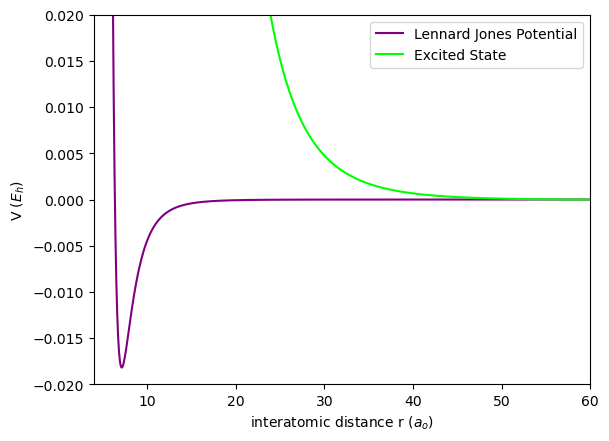

In [5]:
plt.plot(rpp, VLJ, color = 'purple', label = 'Lennard Jones Potential')
plt.plot(rpp, VE, color = 'lime', label = 'Excited State')
plt.ylabel('V $(E_h)$')
plt.xlabel('interatomic distance r $(a_o)$')
plt.legend()
plt.ylim(-0.02,0.02)
plt.xlim(4,60)

print(f' N1 = {Npp}')

(4.0, 200.0)

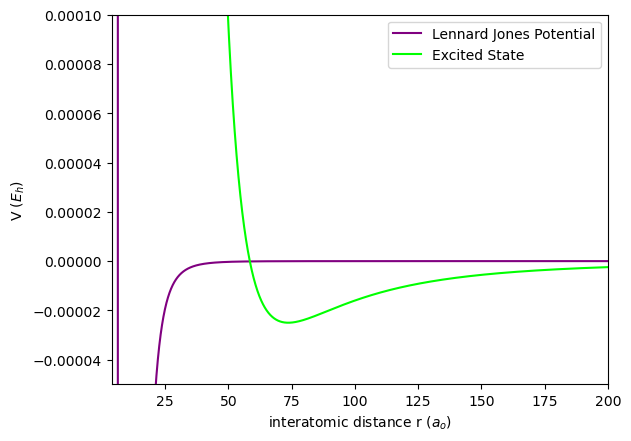

In [6]:
plt.plot(rpp, VLJ, color = 'purple', label = 'Lennard Jones Potential')
plt.plot(rpp, VE, color = 'lime', label = 'Excited State')
plt.ylabel('V $(E_h)$')
plt.xlabel('interatomic distance r $(a_o)$')
plt.legend()
plt.ylim(-5e-5,10e-5)
plt.xlim(4,200)

#print(f' N = {Npp}')

# Scattering States of the Lennard Jones Potential

In [8]:
def Numerov(Energy, Num, V_r, dr, grid): # function to find psi(r) continuum state (E>0)
    psi[0] = 0 # impose boundary condition psi(0) = 0
    psi[1] = dr # let psi(1) = the spacing length
    #print(f' psi[1] = {psi[1]}')
    ksq = 2*mu*(Energy - V_r) # wave number squared for the energy
    ksq_p = 2*mu*Energy

    for i in range(2,Num-1):  # Numerov Algorithm, range is 2 -> N since psi(0), psi(1) already set
        #if i < 100:
           # print(f' first term in numerator is {(2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1])}')
           # print(f' the numerator is {((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))}')
        psi[i] = ((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))/(1 + (1/12)*(dr**2)*ksq[i])
    Psi_f = psi/max(psi) # divide Psi by its largest value to qvoid it becoming too large
    Psi_prime = np.gradient(Psi_f, grid) # find the derivate over the grid r
    
    # Energy Normalization
    A_term = Psi_f[-1]**2
    B_term = Psi_prime[-1]**2
    B_coef = 1/(ksq[-1])
    U_sq = A_term + B_coef*B_term
    U = np.sqrt(U_sq)
    norm_factor = np.sqrt((2*mu)*(1/(np.pi*np.sqrt(ksq[-1]))))
    #print((U,norm_factor))
    
    Psi_Energy_Normalized = (1/U)*(Psi_f)*norm_factor
    
        
    return Psi_Energy_Normalized

(4.0, 150.0)

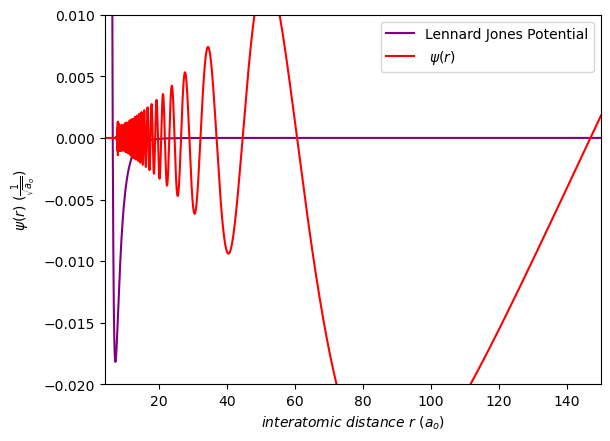

In [9]:
VLJ = (C12/(rpp**12)) - (C6/(rpp**6))
psi = np.zeros(Npp-1)  # initializing psi(r) as array of zeros
Psi_1 = Numerov(Eo, Npp-1, VLJ, dr3, rpp) # wave function Psi
#plt.plot(r, Psi_1, label = f' $\\psi(r)$', color = 'red') 
plt.plot(rpp, VLJ, color = 'purple', label = 'Lennard Jones Potential')

psi_1prime = np.gradient(Psi_1, rpp) # first posistion derivate of wave function Psi
plt.plot(rpp, Psi_1, label = f' $\\psi(r)$', color = 'red') 
#plt.plot(r, Vr*1e0, label = 'Scaled Lennard-Jones Potential', color = 'purple')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
plt.legend()

plt.ylim(-0.02,0.01)
#plt.ylim(-0.001,0.001)
plt.xlim(4,150)

(6.0, 20.0)

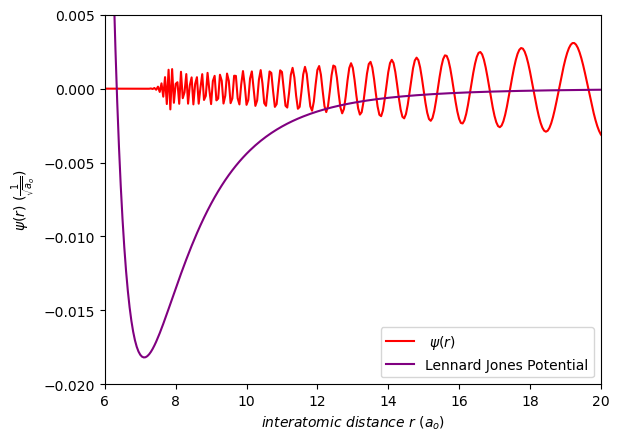

In [10]:
VLJ = (C12/(rpp**12)) - (C6/(rpp**6))
psi = np.zeros(Npp-1)  # initializing psi(r) as array of zeros
Psi_1 = Numerov(Eo, Npp-1, VLJ, dr3, rpp) # wave function Psi
plt.plot(rpp, Psi_1, label = f' $\\psi(r)$', color = 'red') 
plt.plot(rpp, VLJ, color = 'purple', label = 'Lennard Jones Potential')


psi_1prime = np.gradient(Psi_1, rpp) # first posistion derivate of wave function Psi
#plt.plot(rpp, Psi_1, label = f' $\\psi(r)$', color = 'red') 
#plt.plot(r, Vr*1e0, label = 'Scaled Lennard-Jones Potential', color = 'purple')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
plt.legend()

plt.ylim(-0.02,0.005)
plt.xlim(6,20)

# Bound States of Excited Potential

In [12]:
def Hamiltonian_DVR(a, b, dx): # DVR method for finding bound states
    N = int((b-a)/dx) # Number of grid points
    ipaper = np.arange(1,N, 1.0) # indexing from the paper, given i = 1,2,...,N-1
    x = a + dx*ipaper # grid from paper
    Vx = C6p/(x**6) - C3/(x**3) # Lennard-Jones potential
    Vx = np.insert(Vx,0,0) # Insert a 0 at the 0th index of list to account for mismatched indexing

    #print(f' ipaper = {ipaper}')
    #print(f' x = {x}')
    print(f' N - 1 = {N-1}')
    #print(f' len(x) = {len(x)}')
    #print(x[-1]/(b-dx))
    #print(x[0]/(a+dx))
    #print(f' dx = {dx}')
    #print(f'dx from grid  = {x[1] - x[0]}')
    #print(Vx[len(Vx) - 1]/(0.5*(b - dx - d)**2))

    H_DVR = np.zeros((len(x), len(x))) # Initialize empty Hamiltonian matrix of size N-1 x N-1
    Vmat = np.zeros((len(x) + 10, len(x) + 10))
    Tmat = np.zeros((len(x) + 10, len(x) + 10))


    for i in ipaper:
        for j in ipaper:
            if int(i) == int(j): # fill in diagonal components of the Hamiltonian
                prefactorii = (np.pi**2)/(4*mu*(b-a)**2)
                bracketii = ((2*N**2 + 1)/3) - (1/((np.sin(np.pi*(i/N)))**2))
                
                Tmat[int(i)][int(j)] = prefactorii*bracketii
                Vmat[int(i)][int(j)] = Vx[int(j)]
                
                H_DVR[int(i) - 1][int(j) - 1] = Tmat[int(i)][int(j)] + Vmat[int(i)][int(j)]
            
            if i != j: # fill in off-diagonal components of the Hamiltonian
                diff = i - j
                prefactorij = ((-1)**(diff))*(np.pi**2)/(4*mu*(b-a)**2)
                bracketij = (1/((np.sin(np.pi*((diff)/(2*N))))**2)) - (1/((np.sin(np.pi*((i+j)/(2*N))))**2))
                Tmat[int(i)][int(j)] = prefactorij*bracketij               
                
                H_DVR[int(i) - 1][int(j) - 1] = Tmat[int(i)][int(j)]
                
    #assert(np.allclose(H_DVR, np.transpose(H_DVR)))
    #print(f' H = {H}')
    return H_DVR

In [13]:
print(rpp[1900])

99.55000000000001


In [14]:
r1p = 42

print(r1p)
print(r4_list)

#a1 = 16
#b1 = 95.5 + a1
#dx1 = 0.01

#N1 = int((b1-a1)/dx1) # Number of grid points
#ipap = np.arange(1,N1, 1.0) # indexing from the paper, given i = 1,2,...,N-1
#x1 = a1 + dx1*ipap

#V1excited = C6p/(x1**6) - C3/(x1**3)
#V1excited_pos = C6p/(x1**6) - C3/(x1**3) + 5
#Vmin = min(VLJ)

Eig_vals = []

for i in range(len(r4_list)):
    H = Hamiltonian_DVR(r1p, r4_list[i], dr3)
    Heig = np.linalg.eigh(H)[0]
    print(f'there are {len(Heig[Heig < 0])} bound states when r2 = {r4_list[i]}')
    Eig_vals.append(Heig)


42
[200 300 400 500]
 N - 1 = 3159
there are 54 bound states when r2 = 200
 N - 1 = 5159
there are 69 bound states when r2 = 300
 N - 1 = 7159
there are 77 bound states when r2 = 400
 N - 1 = 9159
there are 83 bound states when r2 = 500


83


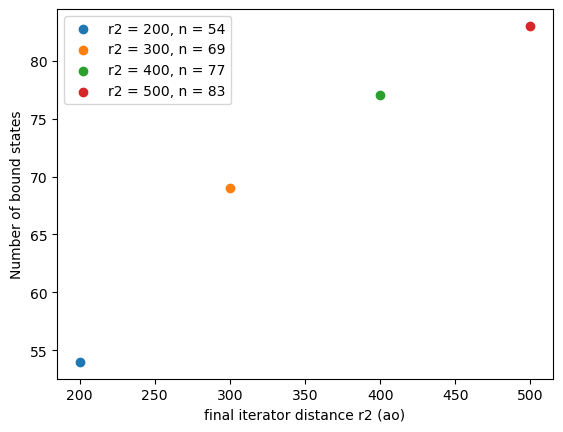

In [15]:
Bound_states = [[],[],[],[]]

for i in range(len(Eig_vals)):
    for val in Eig_vals[i]:
        if val < 0:
            Bound_states[i].append(val)

print(len(Bound_states[3]))
for i in range(len(r4_list)):
    plt.scatter(r4_list[i], len(Bound_states[i]), label = f'r2 = {r4_list[i]}, n = {len(Bound_states[i])}')

plt.ylabel('Number of bound states')
plt.xlabel('final iterator distance r2 (ao)')
plt.legend()

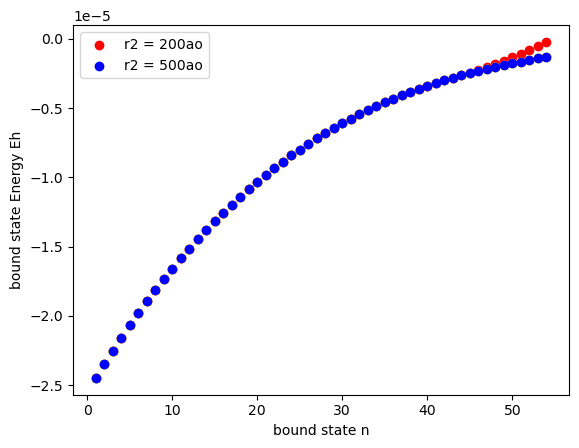

In [16]:
plt.scatter(np.arange(1,55,1), Bound_states[0][:54], color = 'red', label = 'r2 = 200ao')
plt.scatter(np.arange(1,55,1), Bound_states[1][:54], color = 'orange')
plt.scatter(np.arange(1,55,1), Bound_states[2][:54], color = 'yellow')
plt.scatter(np.arange(1,55,1), Bound_states[3][:54], color = 'blue', label = 'r2 = 500ao')

plt.xlabel('bound state n')
plt.ylabel('bound state Energy Eh')
plt.legend()

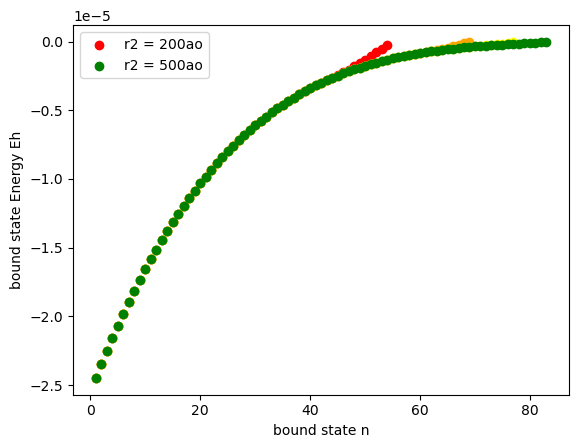

In [17]:
plt.scatter(np.arange(1,55,1), Bound_states[0][:54], color = 'red', label = 'r2 = 200ao')
plt.scatter(np.arange(1,70,1), Bound_states[1][:69], color = 'orange')
plt.scatter(np.arange(1,78,1), Bound_states[2][:77], color = 'yellow')
plt.scatter(np.arange(1,84,1), Bound_states[3][:83], color = 'green', label = 'r2 = 500ao')

plt.xlabel('bound state n')
plt.ylabel('bound state Energy Eh')
plt.legend()
        
    

## At $ r = 337.9a_o$, $|V_{LJ}| \approx E_{o} = 1\mu K $, so a standard choice for r2 is $ 2 * 340a_o = 680a_o$

In [19]:
rs = 680

H = Hamiltonian_DVR(r1p, rs, dr3)
rppp = np.linspace(r1p, rs, len(H[0]))


Heig = np.linalg.eigh(H)[0]
print(f'there are {len(Heig[Heig < 0])} bound states')

Eigvec = np.linalg.eigh(H)[1]
Hvec = []
for i in range(len(H[0])):
    avec = Eigvec[:,i]
    Hvec.append(avec)
for i in range(len(Hvec)):
    INT = np.trapz(np.abs(Hvec[i])**2,rppp)
    A = 1/np.sqrt(INT)
    Hvec[i] = A*Hvec[i]

 N - 1 = 12759


KeyboardInterrupt: 

In [ ]:
V1excited = C6p/(rppp**6) - C3/(rppp**3)

plt.plot(rppp, V1excited, color = 'lime')
plt.hlines(0, r1p, rs, color = 'black')

for i in range(len(Heig[Heig < 0])):
 #   if i % 5 == 0:
  #      plt.plot(rp, 0.0005*np.abs(Hvec[i])**2 + Heig[i])
    if i == 3:
        plt.plot(rppp, 0.0001*np.abs(Hvec[i])**2 + Heig[i], color = 'fuchsia', label = f'n = {i+1}')

plt.legend()
plt.ylim(-3e-5,0.5e-5)
plt.xlim(50,rs)
#plt.xlim(50,70)
print(Heig[0:30])

In [ ]:
aehb24iqo

# Normalization check for bound eigenstates
# $ \braket{\varphi_{n}|\varphi_{m}} = \delta_{nm} = \int_a^b \varphi^*_{n}\varphi_{m}\,dx$

In [ ]:
for i in range(len(Heig[Heig < 0])): # run through all eigenvectors corresponding to bound states
    for j in range(len(Heig[Heig < 0])): # run through all other eigenvectors corresponding to bound states
        
        if i == j: # inner product should be close to 1
            phi_n = np.conjugate(Hvec[i])
            phi_m = Hvec[j]
            produit = phi_n*phi_m
            InnerProduct = np.trapz(produit, rppp)
            assert(InnerProduct - 1 <= tol)

        if i != j: # inner product should be close to 0
            phi_n = np.conjugate(Hvec[i])
            phi_m = Hvec[j]
            produit = phi_n*phi_m
            InnerProduct = np.trapz(produit, rppp)
            assert(InnerProduct <= tol)

# Inner product between bound excited state wave functions and continuum ground state scattering wave functions

# Franck-Condon Factor
## $ \braket{\varphi_{b}|\psi_{s}}  = \int_{r1}^{r2} \varphi^*_{b}\psi_{s}\,dr$

In [ ]:
PHI_B = np.conjugate(Hvec[0])
Integrand = PHI_B*Psi_1
Inner_Product = np.trapz(Integrand, rppp)
print(Inner_Product)

## NEXT: 
### 1.) Vary bound states with in FC factor and see if there is a trend (choose different bound state for the same scattering state)

In [ ]:
FC_factors = []
for i in range(len(Heig[Heig<0])):
    PHI_B = np.conjugate(Hvec[i])
    Integrand = PHI_B*Psi_1
    Inner_Product = np.trapz(Integrand, rpp)
    FC_factors.append(Inner_Product)
    
#print(FC_factors)

In [ ]:
plt.scatter(np.arange(1, len(Heig[Heig<0]) +1), FC_factors, color = 'orange')
plt.xlabel('Energy Bound State $ \\phi_n $')
plt.ylabel(' Franck-Condon Factor')

### 2.) Vary scattering length (C12 coefficient) to see the effect on a paticular bound state (Vary the C12 coefficient in the LJ potential and compare FC factor for the same excited bound state)

# C12 coefs close together, C12 from 1.101e8Ehao $→$ 1.107e8Ehao, $a_s$ from 173ao $→$ 3287ao

In [ ]:
scattering_lengths = [172.602221388203, 481.2595379224736, 952.415528215597, 1471.1931561033157, 1742.2646202424162, 2064.5780661063022, 2752.74183292935, 3047.4514287960233, 3286.925811384513]
C12_coefs = [110125316.4556962, 110546835.44303797, 110637974.68354431, 110672151.89873418, 110683544.30379747, 110694936.70886075, 110717721.51898734, 110729113.92405063, 110740506.32911393]


In [ ]:
FC_Factors_as = []
for i in range(len(C12_coefs)): 
    VLJ_as = (C12_coefs[i]/(rpp**12)) - (C6/(rpp**6)) # a Lennard-Jones potential with a paticular scattering length
    psi = np.zeros(Npp-1)  # initializing psi(r) as array of zeros
    Psi_as = Numerov(Eo, Npp-1, VLJ_as, dr3, rpp) # wave function Psi for a paticular scattering length
    plt.plot(rpp, VLJ_as)
    #plt.plot(rpp, Psi_as, label = f' $\\psi(r)$')

        
    PHI_0 = np.conjugate(Hvec[1])
    Integrand = PHI_0*Psi_as
    Inner_Product = np.trapz(Integrand, rpp)
    FC_Factors_as.append(Inner_Product)

plt.ylim(-0.06, 0.05)
plt.xlim(4, 50)
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
#plt.legend()

In [ ]:
plt.scatter(scattering_lengths, FC_Factors_as, color = 'cyan')
plt.ylabel(f' FC factor')
plt.xlabel(f' scattering length $a_s$ $(a_o)$')

In [ ]:
scattering_lengths = [113.8516551094902, 5.746321736477064, 20.606160274287053, 247.79307096472178, 4026.3286646216734, 351.4251021304227, 81.99422257251294, 297.3309524501701, 4232.476206466469, -179.45201030003605, 729.0426690692904, 138.41981172299035, 34.4601787324823, 251.46816473119452, 22.434179895789313, 120.95363253404201, 474.40137082945125, -70.57572533257503, 24.10607474937988, 54.12381854111885, 66.01725106085873, 65.59026933551091, 53.73200763281513, 27.584174043853842, -34.29055509074918, 3886.0237078382484, 224.68008929406528, 110.23653017385668, 45.272502813236656, -172.04941929108205, 182.10876492883264, 70.7825958187148, -116.56823061472818, 158.12397877676278, 42.84703598817416, 625.0581088242633, 86.43739210624905, -188.16948466324567, 113.13586099850777, -64.63804534768059, 125.42830687938111, -53.65147399698386, 120.22853730383967]
C12_list = np.linspace(1e8, 1e9, 80) # variable range of C12 coefficients, from 1e8 -> 1e9 Ehao
C12_coefs = C12_list[0: int(len(scattering_lengths))]

# C12 coefs farther apart, C12 from 1e8Ehao $→$ 0.6e9Ehao, $a_s$ from -188ao $→$ 4026ao

In [ ]:
FC_Factors_as0 = []
FC_Factors_as1 = []
FC_Factors_as2 = []
for i in range(len(C12_coefs)): 
    VLJ_as = (C12_coefs[i]/(rpp**12)) - (C6/(rpp**6)) # a Lennard-Jones potential with a paticular scattering length
    psi = np.zeros(Npp-1)  # initializing psi(r) as array of zeros
    Psi_as = Numerov(Eo, Npp-1, VLJ_as, dr3, rpp) # wave function Psi for a paticular scattering length
    plt.plot(rpp, VLJ_as)
    #plt.plot(rpp, Psi_as, label = f' $\\psi(r)$')

        
    PHI_0 = np.conjugate(Hvec[0])
    PHI_1 = np.conjugate(Hvec[1])
    PHI_2 = np.conjugate(Hvec[2])
    Integrand0 = PHI_0*Psi_as
    Integrand1 = PHI_1*Psi_as
    Integrand2 = PHI_2*Psi_as
    Inner_Product0 = np.trapz(Integrand0, rpp)
    Inner_Product1 = np.trapz(Integrand1, rpp)
    Inner_Product2 = np.trapz(Integrand2, rpp)
    FC_Factors_as0.append(Inner_Product0)
    FC_Factors_as1.append(Inner_Product1)
    FC_Factors_as2.append(Inner_Product2)

plt.ylim(-0.06, 0.05)
plt.xlim(4, 50)
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
#plt.legend()

In [ ]:
plt.scatter(scattering_lengths, FC_Factors_as0, color = 'cyan')
plt.scatter(scattering_lengths, FC_Factors_as1, color = 'seagreen')
#plt.scatter(scattering_lengths, FC_Factors_as2, color = 'magenta')
plt.ylabel(f' FC factor')
plt.xlabel(f' scattering length $a_s$ $(a_o)$')
plt.hlines(0, min(scattering_lengths), max(scattering_lengths), color = 'black')